<a href="https://colab.research.google.com/github/sricharanmergu/Deloitte-Virtual-internship/blob/main/Otistrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy scipy matplotlib yfinance pandas

In [6]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price

# Test it: Price of a Call option with Stock at 100, Strike at 100, 1 year expiry
print(f"Call Price: {black_scholes(100, 100, 1, 0.05, 0.2, 'call'):.2f}")

Call Price: 10.45


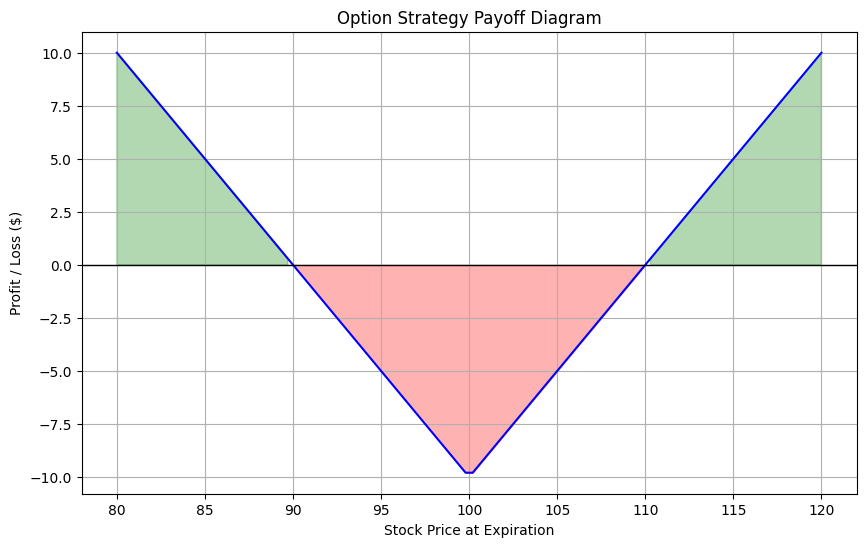

In [7]:
import matplotlib.pyplot as plt

def plot_strategy(strikes, premiums, types, S_range):
    """
    strikes: list of strike prices (e.g., [100, 110])
    premiums: list of premiums paid (+) or received (-)
    types: 'call' or 'put'
    S_range: numpy array of potential stock prices at expiration
    """
    total_payoff = np.zeros_like(S_range)

    for K, prem, type_ in zip(strikes, premiums, types):
        if type_ == 'call':
            payoff = np.maximum(S_range - K, 0) - prem
        else:
            payoff = np.maximum(K - S_range, 0) - prem
        total_payoff += payoff

    plt.figure(figsize=(10, 6))
    plt.plot(S_range, total_payoff, label="Strategy P&L", color='blue')
    plt.axhline(0, color='black', lw=1)
    plt.fill_between(S_range, total_payoff, 0, where=(total_payoff > 0), color='green', alpha=0.3)
    plt.fill_between(S_range, total_payoff, 0, where=(total_payoff < 0), color='red', alpha=0.3)
    plt.title("Option Strategy Payoff Diagram")
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit / Loss ($)")
    plt.grid(True)
    plt.show()

# Example: Long Straddle (Buy Call + Buy Put at 100)
S_prices = np.linspace(80, 120, 100)
# Assuming we paid $5 premium for call and $5 for put
plot_strategy([100, 100], [5, 5], ['call', 'put'], S_prices)